<a href="https://colab.research.google.com/github/EltonGS/covid-19_previsao_leito_UTI/blob/main/Notebooks/3_modelos_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Esse é o terceiro, e último, notebook desse projeto. Nele a base de dados disponibilizada pelo Hospital Sírio Libanês é utilizada para a o treinamento e teste de **Modelos de Macine Learning** com o objetivo de prever se um paciente precisará, ou não, ser admitido na UTI com base nos dados disponíveis. A base de dados foi tratada no notebook **tratamento_dados** e analisada no notebook **analise_dos_dados**.

### Mas o que é Machine Learning ou Aprendizado de Máquina?

De acordo com a **IBM**, **Machine Learning é o ramo da ciência da computação e inteligência artificial que foca no uso de dados e algoritmos para imitar a maneira como humanos pensam, melhorando sua acurácia gradualmente**.

**Machine Learning** é um componente importante no crescente campo da **Ciência de Dados**. Através de métodos estatísticos, algoritmos são treinados para realizar classificação ou previsões, realizando descobertas em projetos de mineração de dados. Essas descobertas guiam tomadas de decisão de negócios ou em aplicações.

### O uso de Machine Learning em Sistemas de Saúde

<p style="clear:both;margin-bottom:20px;"><a href="https://healthinformatics.uic.edu/blog/machine-learning-in-healthcare/" rel="noreferrer" target="_blank"><img src="https://s3.amazonaws.com/utep-uploads/wp-content/uploads/UIC/2020/11/13094738/How-Machine-Learning-is-Applied-in-Healthcare-1.jpg" alt="Six ways in which machine learning is used to improve healthcare." style="max-width:100%;" /></a></p><p style="clear:both;margin-bottom:20px;"><a href="https://healthinformatics.uic.edu" rel="noreferrer" target="_blank">University of Illinois at Chicago </a></p>


Conforme demonstrado pela imagem acima, da Universidade de Illinois em Chicago, Machine Learning já é utilizado em sistemas de saúde e ajudam na evolução de tratamentos.

Para a base de dados disponibilizada pelo Hospital Sírio Libanês, o **objetivo é identificar se um paciente necessitará de tratamento na UTI com base nos dados informados**. É necessário **CLASSIFICAR** se o paciente precisa ou não de UTI.

Para isso serão utilizados algoritmos de classificação.


# Informações sobre os dados

O **Hospital Sírio Libanês** disponibilizou a base de dados no **Kaggle** para a comunidade analisar e criar modelos de **Machine Learning** que ajudem a identificar a necessidade de **UTI** para os pacientes que chegam ao hospital com Covid-19.

No notebook de tratamendo dos dados tem a explicação fornecida pelo Sírio Libanês em como trabalhar com os dados. Relembrando:

- **O objetivo é identificar quais pacientes precisarão de UTI e também quais não precisarão**.

- **A partir do momento que o paciente é admitido na UTI os dados não devem ser utilizados para treinar o modelo**.

- **Clinicamente é interessante que o diagnóstico da necessidade de UTI, ou não, seja realizado o mais rapidamente possível**.

Com base nessas especificações do Hospital Sírio Libanês a seguinte decisão foi tomada:

- **Serão analisados os dados da primeira (entre 0 e 2 horas da chegada do paciente ao hospital). Tendo assim um modelo que pode ser utilizado assim que o paciente chega ao hospital**.

# Modelos de Machine Learning utilizados

O problema apresentado pelo Hospital Sírio Libanês é de classificação.

Os modelos de classificação serão importados da biblioteca **[SciKit Learn](https://scikit-learn.org/stable/)**.

Os **modelos escolhidos** para serem testados com a base de dados são:

- **Random Forest Classifier**;

- **Logistic Regression**;

Os modelos do tipo **SVM (Support Vector Machine)**:

* **SVC (Support Vector Classifier)**;

* **LinearSVC ( Linear Support Vector Classifier)**;

Os modelos serão explicados quando utilizados.

### Separação dos dados entre treino e teste

Para o treinamento e teste do modelo é necessário a separação da base dados entre treino e teste. Para esse projeto a separação será 80% dos dados para treino e 20% dos dados para teste.

Essa divisão será realizada utilizando os metódos **RepeatedStratifiedKFold** e **train_test_split** disponibilizados pelo **SciKit Learn**.

### Métricas de avaliação

As **métricas de avaliação** utilizadas para medir a **eficácia** dos modelos de Machine Learning serão:

- **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: A curva ROC demonstra o quão bom o modelo é em definir entre dois valores, por isso é utilizado para modelos de classficação. A métrica ROC possui 2 parâmetros:

> * **Taxa de verdadeiro positivo**: que é medida por *verdadeiro positivo* / *(verdadeiro positivo + falso negativos)*;

> * **Taxa de falso positivo**: é medida por *falso positivo* / *(falso positivo + verdadeiro negativo)*

O **AUC** é a área sob a curva e varia entre 0 e 1. Quanto mais próximo de 1 melhor está o modelo.

- **Matriz de Confusão (Confusion Matrix)**: é uma medida de performance para um modelo de classificação. É uma tabela com 4 diferentes combinações dos valores reais e os previstos. O resultado é uma matriz com 4 valores:

> - **Verdadeiro Positivo**: o valor real e o previsto são positivos;
> - **Verdadeiro Negativo**: o valor real e o previsto são negativos;
> - **Falso Positivo**: o valor real é negativo e foi previsto como positivo;
> - **Falso Negativo**: o valor real é positivo e foi previsto como negativo;

Após a previsão realizada pelo modelo é possível extrair outras métricas como *Precision, Recall, F1 Score*.

- **Precision**: de todas os valores previstos como positivos, quantos eram positivos no dados reais. Utilizado quando o falso positivo tem um resultado muito impactante quando comparado com o falso negativo;
- **Recall**: de todos os valores positivos, quantos foram os previstos como positivos. Utilizado quando o falso negativo tem um impacto muito maior que o falso positivo;
- **F1 Score**: média harmônica entre o o Precision e o Recall.

# Recursos Utilizados

Essa seção contém as **bibliotecas** e **funções** utilizadas nesse notebook.

### Bibliotecas utilizadas

In [1]:
# manipulação dos dados
import pandas as pd
import numpy as np

# visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

# divisão dos dados
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

# teste dos hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV

# métricas de avaliação do modelo
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, classification_report

### Funções

In [2]:
def dimensao_dados (dados):
  """
  Essa função verifica as dimensões do dataframe
  
  Retorna a quantidade de linhas e colunas
  """
  # verifica as dimensões do dataframe
  linha, coluna = dados.shape

  # imprime as dimensões do dataframe
  return print(f'O dataframe possui {linha} linhas e {coluna} colunas.')

In [3]:
def divide_dados(dados):
  """
  Função para dividir os dados em treino e teste
  ===============================================
  Retorna os valores de X e y para treino e teste
  """
  # separa os dados
  x_colunas = dados.describe().columns
  y = dados['icu']
  x = dados[x_colunas].drop(['icu'], axis=1)

  # divide os dados em treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,
                                                      random_state=481516, test_size=0.2)
  
  return x_train, x_test, y_train, y_test

In [4]:
def cv_modelo(modelo, dados, n_splits, n_repeats):
  """
  Executa a validação cruzada para o modelo informado.

  Retorna o auc_medio para os dados de treino e teste
  """
  
  # define a seed
  np.random.seed(481516)

  # embaralha os dados
  dados = dados.sample(frac=1).reset_index(drop=True) # frac = 1 pega todos os dados

  # define as colunas a serem utilizadas
  x_columns = dados.columns
  y = dados['icu']
  x = dados[x_columns].drop(['icu', 'window'], axis=1)

  # instancia o Repeated Stratified K Fold
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)

  # realiza a validação cruzada
  resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True) # return_train_score retorna os testes realizados com os dados de treino,
                                                                                              # utilizado para visualizar o max_depth da decision tree

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  auc_std = np.std(resultados['test_score'])

  print(f'AUC médio para os dados de teste: {auc_medio}')
  print(f'AUC médio para os dados de treino: {auc_medio_treino}')
  print(f'Intervalo da AUC para os dados de teste: {auc_medio - (2* auc_std)} - {auc_medio + (2* auc_std)}')

  return auc_medio, auc_medio_treino

In [5]:
def teste_hiperparametro(modelo, dados, hiperparametros):
  """
  Função que testa hiperparâmetro para um determinado modelo.

  Retorna os melhores hiperparâmetros
  """
  # define a seed
  np.random.seed(481516)

  # embaralha os dados
  dados = dados.sample(frac=1).reset_index(drop=True) # frac = 1 pega todos os dados

  # define as colunas a serem utilizadas
  x_columns = dados.columns
  y = dados['icu']
  x = dados[x_columns].drop(['icu', 'window'], axis=1)

  # divisão dos dados
  cv = RepeatedStratifiedKFold(random_state=481516)

  # testa os hiperparâmetros
  modelo_hiper_teste = RandomizedSearchCV(modelo, param_distributions=hiperparametros,
                                          cv=cv, scoring='roc_auc', random_state=481516,
                                          n_jobs=-1)
  
  hiper_param_selec = modelo_hiper_teste.fit(x, y)

  return hiper_param_selec.best_params_, hiper_param_selec.best_score_

In [6]:
def plota_curva_roc(modelo, tipo_modelo, dados, cor_curva):
  """
  Plota um gráfico com a curva ROC para o modelo espeficicado.

  ============================================================

  Parâmetros:

  modelo: modelo instanciado

  tipo_modelo: qual o modelo que será plotado

  dados: dataframe utilizado no modelo

  cor_cuva: cor da curva que será plotada
  """
  
  # divide os dados
  x_train, x_test, y_train, y_test = divide_dados(dados)
  
  # cria a figura
  fig = plt.subplots(figsize=(10, 10))
  ax = plt.axes()

  # plota a curva AUC
  plot_roc_curve(modelo, x_test, y_test, ax=ax, color=cor_curva)

  # define o título e o labels para os eixos
  plt.title(f'Curva ROC para o modelo {tipo_modelo}\n', fontsize=20, fontweight='bold',
           color='black')
  plt.ylabel('Razão de Verdadeiro Positivo (VP)', fontsize=11, color='dimgrey',
             fontweight='bold')
  plt.xlabel('Razão de Falto Positivo (FP)', fontsize=11, color='dimgrey',
             fontweight='bold')

  # parâmetros das linhas ao redor do gráfico
  ax.spines['bottom'].set_color('silver')
  ax.spines['left'].set_color('silver')
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)

  # cria a grid
  ax.grid(axis='both', which='major', linestyle='dotted')

  # manipula a legenda
  ax.legend(loc='upper left', fontsize=10)

  plt.show()

In [7]:
def plota_matriz_confusa(modelo, tipo_modelo, dados, paleta_matriz):
  """
  Função plota a matriz de confusão do modelo informado

  =====================================================

  Parâmetros:

  modelo: modelo instanciado

  dados: dataframe utilizado para treinar/testar o modelo

  paleta_matriz: paleta de cores utilizada para plotar a matriz
  """

  # divide os dados
  x_train, x_test, y_train, y_test = divide_dados(dados)

  # cria a figura e os eixos
  fig = plt.figure(figsize=(10, 10))
  ax = plt.axes()

  # plota a matriz
  plot_confusion_matrix(modelo, x_test, y_test, ax = ax, cmap = paleta_matriz,
                        display_labels=['UTI NÃO', 'UTI SIM'])
  
  # remove a colorbar
  fig.delaxes(fig.axes[1])
  
  # define o título e o labels para os eixos
  plt.title(f'Matriz de Confusão para o modelo {tipo_modelo}\n', fontsize=20, fontweight='bold',
           color='black')
  plt.ylabel('CLASSIFICAÇÃO REAL', fontsize=11, color='dimgrey',
             fontweight='bold')
  plt.xlabel('CLASSIFICAÇÃO PREVISTA', fontsize=11, color='dimgrey',
             fontweight='bold')
  
  plt.show()

# Carregando os dados

In [8]:
# endereço dos dados
url = 'https://raw.githubusercontent.com/EltonGS/covid_ML_previsao_UTI/main/Dados/Dados%20Tratados/dados_ml.csv'

# carrega os dados
dados = pd.read_csv(url)

# visualiza os dados
dados.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease grouping 1,disease grouping 2,disease grouping 3,disease grouping 4,disease grouping 5,disease grouping 6,htn,immunocompromised,other,albumin_median,albumin_diff,be_arterial_median,be_arterial_diff,be_venous_median,be_venous_diff,bic_arterial_median,bic_arterial_diff,bic_venous_median,bic_venous_diff,billirubin_median,billirubin_diff,blast_median,blast_diff,calcium_median,calcium_diff,creatinin_median,creatinin_diff,ffa_median,ffa_diff,ggt_median,ggt_diff,glucose_median,glucose_diff,hematocrite_median,hematocrite_diff,hemoglobin_diff,...,pcr_median,pcr_diff,ph_arterial_median,ph_arterial_diff,ph_venous_median,ph_venous_diff,platelets_median,platelets_diff,potassium_median,potassium_diff,sat02_arterial_median,sat02_arterial_diff,sat02_venous_median,sat02_venous_diff,sodium_median,sodium_diff,tgo_median,tgo_diff,tgp_median,tgp_diff,ttpa_median,ttpa_diff,urea_median,urea_diff,dimer_median,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,window,icu
0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,...,-0.875236,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,...,-0.939887,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
2,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,...,-0.503592,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,...,-0.990926,-1.0,0.234043,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.592593,-1.0,0.939394,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
4,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,...,-0.997732,-1.0,0.234043,-1.0,0.363636,-1.0,-0.292390,-1.0,-0.666667,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.997947,-1.0,-0.988948,-1.0,-0.846633,-1.0,-0.884337,-1.0,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,0-2,0


In [9]:
# verifica as dimensões do dataframe
dimensao_dados(dados)

O dataframe possui 352 linhas e 97 colunas.


O dataframe utilizado aqui informações de **352 pacientes** e **97 features** (colunas) para alimentar os modelos de Machine Learning.

A coluna **patient_visit_identifier** será removida dos dados pois não possui informação relevante para a previsão dos modelos.

In [10]:
# remove a coluna
dados_ml = dados.drop('patient_visit_identifier', axis=1)
dados_ml.head()

,age_above65,age_percentil,gender,disease grouping 1,disease grouping 2,disease grouping 3,disease grouping 4,disease grouping 5,disease grouping 6,htn,immunocompromised,other,albumin_median,albumin_diff,be_arterial_median,be_arterial_diff,be_venous_median,be_venous_diff,bic_arterial_median,bic_arterial_diff,bic_venous_median,bic_venous_diff,billirubin_median,billirubin_diff,blast_median,blast_diff,calcium_median,calcium_diff,creatinin_median,creatinin_diff,ffa_median,ffa_diff,ggt_median,ggt_diff,glucose_median,glucose_diff,hematocrite_median,hematocrite_diff,hemoglobin_diff,inr_median,...,pcr_median,pcr_diff,ph_arterial_median,ph_arterial_diff,ph_venous_median,ph_venous_diff,platelets_median,platelets_diff,potassium_median,potassium_diff,sat02_arterial_median,sat02_arterial_diff,sat02_venous_median,sat02_venous_diff,sodium_median,sodium_diff,tgo_median,tgo_diff,tgp_median,tgp_diff,ttpa_median,ttpa_diff,urea_median,urea_diff,dimer_median,dimer_diff,bloodpressure_diastolic_mean,bloodpressure_sistolic_mean,heart_rate_mean,respiratory_rate_mean,temperature_mean,oxygen_saturation_mean,bloodpressure_diastolic_diff,bloodpressure_sistolic_diff,heart_rate_diff,respiratory_rate_diff,temperature_diff,oxygen_saturation_diff,window,icu
0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,-0.932246,...,-0.875236,-1.0,0.234043,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,-0.959849,...,-0.939887,-1.0,0.234043,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
2,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,-0.959849,...,-0.503592,-1.0,0.234043,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
3,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,-0.959849,...,-0.990926,-1.0,0.234043,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.592593,-1.0,0.939394,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,0-2,0
4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,-0.959849,...,-0.997732,-1.0,0.234043,-1.0,0.363636,-1.0,-0.292390,-1.0,-0.666667,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.997947,-1.0,-0.988948,-1.0,-0.846633,-1.0,-0.884337,-1.0,-1.000000,-1.0,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,

In [11]:
# verifica as dimensões do dataframe
dimensao_dados(dados_ml)

O dataframe possui 352 linhas e 96 colunas.


# Teste dos Modelos de Machine Learning

## Modelo Random Forest Classifier

O modelo de **Machine Learning Random Forest Classifier** é definido pelo SciKit Learn como um meta estimador que utiliza um número de árvores de decisão em variadas amostras do dataframe e utiliza média para melhorar a eficácia das previsões e controlar o overfitting.

Os **hiperparâmetros** informados para o modelo são:

**n_estimators**: número de árvores de decisão criadas

**criterion**: a função utilizada para medir a qualidade da divisão nas árvores

**max_depth**: a máxima profundidade das árvores

**max_features**: o número máximo de features a ser considerado em uma divisão das árvores de decisão

Abaixo serão testados diferentes hiperparâmetros para o modelo.


In [12]:
# dicionário com os valores dos hiperparâmetros a serem testados
hiper_param_rfc = {
    'n_estimators' : [50, 100, 200],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 3, 5, 10],
    'max_features' : [None, 'auto', 0.5]
}

# instancia o modelo Random Forest Classifier
modelo_rfc = RandomForestClassifier(random_state=481516)

# testa os hiperparâmetros
teste_hiperparametro(modelo_rfc, dados_ml, hiper_param_rfc)

({'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 100},
 0.8019866292728135)

Para o modelo Random Forest Classifier os melhores parâmetros escolhidos por **RandomizedSearchCV** foram:

**criterion**: entropy

**max_depth**: 5

**max_features**: auto

**n_estimators**: 100

E o **AUC** encontrado pela **validação cruzada** realizado pelo RandomizedSearchCV foi **0.80**.

Valores maiores foram testados nos parâmetros **max_depth** e **n_estimators** mas o tempo adicional de processamente não era justificado na melhora do resultado.

Com os hiperparâmetros definidos é possível continuar com o modelo.

In [13]:
# instancia o modelo
modelo_rfc = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='auto',
                                    n_estimators=100, random_state=481516)

In [14]:
# função para divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = divide_dados(dados_ml)

Essa divisão dos dados será utilizada para os demais modelos testados.

In [15]:
# treina o modelo
modelo_rfc.fit(x_train, y_train)

# realiza a previsão
predicao_rfc = modelo_rfc.predict(x_test)

# verifica a probabilidade da previsão
prob_prev_rfc = modelo_rfc.predict_proba(x_test)

### Avaliação do Modelo Random Forest Classifier

Após o treinamento e a previsão dos dados é possível verificar o quão bem foi essa previsão com base no dados reais. Para verificar isso serão utilizadas as métricas **Classification Report**, **AUC** e **Matriz de Confusão**.

In [16]:
# imprime o Classification Report
print('Classification Report:')
print(classification_report(y_test, predicao_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        38
           1       0.78      0.64      0.70        33

    accuracy                           0.75        71
   macro avg       0.75      0.74      0.74        71
weighted avg       0.75      0.75      0.74        71



O **Classification Report** acima demonstra a performance do modelo de Random Forest:

Na coluna **Precision**:

Dentro de todas as previsões indicando que o paciente não precisa de UTI, o modelo acertou 73%.

Dentro de todas as previsões indicando que o paciente precisa de UTI, o modelo acertou 78%.

Na coluna **Recall**:

Considerando os pacientes que não foram para a UTI, o modelo acertou a previsão para 84% desses pacientes.

Considerando os pacientes que foram para a UTI, o modelo acertou a previsão para 64% desses pacientes.

In [17]:
# calcula o AUC do modelo
auc = roc_auc_score(y_test, prob_prev_rfc[:, 1])

# imprime o valor do AUC
print(f'O AUC para o modelo Random Forest Classifier é: {auc}')

O AUC para o modelo Random Forest Classifier é: 0.7822966507177034


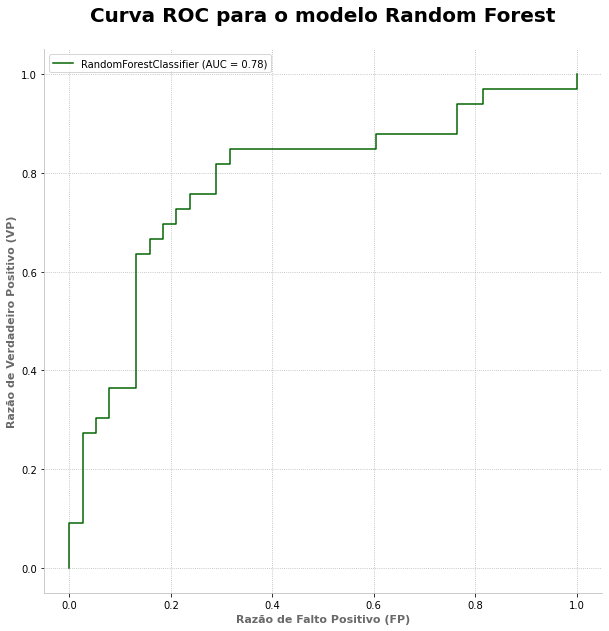

In [18]:
# função para plotar a curva ROC
plota_curva_roc(modelo_rfc, 'Random Forest', dados_ml, 'darkgreen')

As informações acima, **AUC e Curva ROC**, demonstram que o modelo tem um AUC de **0.78**. Esse valor isolado não é ruim, mas quanto é acertado pelo modelo quando paciente precisa ir para a UTI e quando paciente não precisa?

A **Matriz de Confusão** pode ser usada para ver essa métrica.

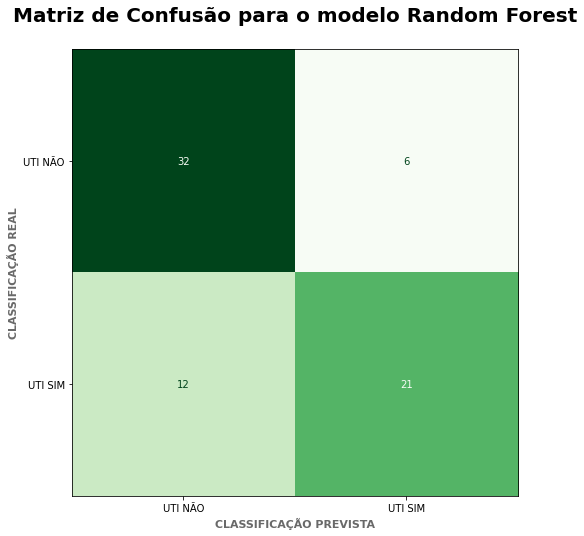

In [19]:
# plota a matriz de confusão
plota_matriz_confusa(modelo_rfc, 'Random Forest', dados_ml, 'Greens')

A **matriz** acima mostra os **valores reais** e os que foram **previstos** pelo modelo.

Na matriz temos as informações:
- 33 pacientes precisaram de UTI, o **modelo classificou corretamente 21 desses pacientes - 64%**.

- 38 pacientes não precisaram de UTI, o **modelo classificou corretamente 32 desses pacientes - 84%**.

**O modelo não prever corretamente que 12 pessoas (36% do total de pessoas que precisaram de UTI) precisariam de UTI é crítico**.

Já sobre os dados de pacientes que não precisaram de UTI, o **modelo errou somente 6 pessoas (16% do total de pacientes que não precisaram de UTI)**.

O modelo tem uma porcentagem de acerto boa para dizer se o paciente não precisará de UTI, mas os falsos negativos são críticos nessa situação. Ao dizer que um paciente não precisa de UTI, e na realidade ele necessita, a doença pode se agravar antes do paciente ter os cuidados necessários.

Para verificar se esses são os valores encontrados com todos os dados ou somente com essa porção será realizada uma **validação cruzada**.

In [20]:
# realiza validação cruzada do modelo
cv_modelo(modelo_rfc, dados_ml, 5, 10)

AUC médio para os dados de teste: 0.8026639618086988
AUC médio para os dados de treino: 0.9784580485772651
Intervalo da AUC para os dados de teste: 0.6979367764546488 - 0.9073911471627488


(0.8026639618086988, 0.9784580485772651)

Na informação acima um **AUC médio de 0.80** foi encontrado nos dados de teste, muito próximo ao encontrado anteriormente (0.78).

O **intervalo** informado foi calculado através do **desvio padrão** e mostra uma variação do AUC de **0.70 a 0.90**. Essa variação ocorre devido a porção dos dados que são selecionadas para realizar o treino e teste na validação cruzada.

### Modelo Logistic Regression

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

Os **hiperparâmetros** informado para o modelo de **Logistic Regression** são:

- **C**: parâmetro de regularização inversa, precisa ser um número float positivo;

- **solver**: algoritmo a ser utilizado na otimização do problema;

- **max_iter**: número máximo de iterações tomadas dos solvers.

- **penalty**: especifica a norma a ser utilizada na penalização da regularização.

In [21]:
# dicionário com os hiperparâmetros
hiper_param_lr = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.2, 0.5, 1.0, 2.0, 3.0],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'max_iter' : [50, 100, 200, 500]
}

# instância o modelo
modelo_lr = LogisticRegression(random_state=481516)

# testa os hiperparâmetros
teste_hiperparametro(modelo_lr, dados_ml, hiper_param_lr)

({'C': 1.0, 'max_iter': 50, 'penalty': 'l2', 'solver': 'newton-cg'},
 0.7693819237898184)

Os **hiperparâmetros selecionados** como os melhores para o modelo Logistic Regression foram:

- penalty: **l2**

- C: **1.0**

- solver: **newton-cg**

- max_iter: **100**

E o AUC encontrado pela validação cruzada realizada pelo RandomizedSearchCV foi **0.76**.

*Ao tentar executar o modelo com o valor 50 do max_iter, um warning aconteceu informando que o número de iterações atingiu o limite. Por esse motivo o valor foi alterado para 100.*

In [22]:
# instancia o modelo com os hiperparâmetros informados
modelo_lr = LogisticRegression(penalty='l2', C=1.0, solver='newton-cg',
                               max_iter=100, random_state=481516)

Os dados já foram divididos para o modelo Random Forest, não há necessidade de dividir novamente.

In [23]:
# treina o modelo
modelo_lr.fit(x_train, y_train)

# realiza a previsão
previsao_lr = modelo_lr.predict(x_test)

# verifica a probabilidade da previsão
prob_prev_lr = modelo_lr.predict_proba(x_test)

### Avaliação do modelo Logistic Regression

Como para o modelo Random Forest, aqui serão avaliadas as métricas informadas pelo **Classification Report**, **ROC AUC** e **Matriz de Confusão**.

In [24]:
# imprime o Classification Report
print('Classification Report:\n')
print(classification_report(y_test, previsao_lr))

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.75      0.64      0.69        33

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71



O **Classification Report** acima demonstra a performance do modelo de **Logistic Regression**:

Na coluna **Precision**:

Dentro de todas as previsões indicando que o paciente não precisa de UTI, o modelo acertou 72%.

Dentro de todas as previsões indicando que o paciente precisa de UTI, o modelo acertou 75%.

Na coluna **Recall**:

Considerando os pacientes que não foram para a UTI, o modelo acertou a previsão para 82% desses pacientes.

Considerando os pacientes que foram para a UTI, o modelo acertou a previsão para 64% desses pacientes.

In [25]:
# calcula o AUC do modelo
auc = roc_auc_score(y_test, prob_prev_lr[:, 1])

# imprime o valor do AUC
print(f'O AUC para o modelo Random Forest Classifier é: {auc}')

O AUC para o modelo Random Forest Classifier é: 0.7416267942583733


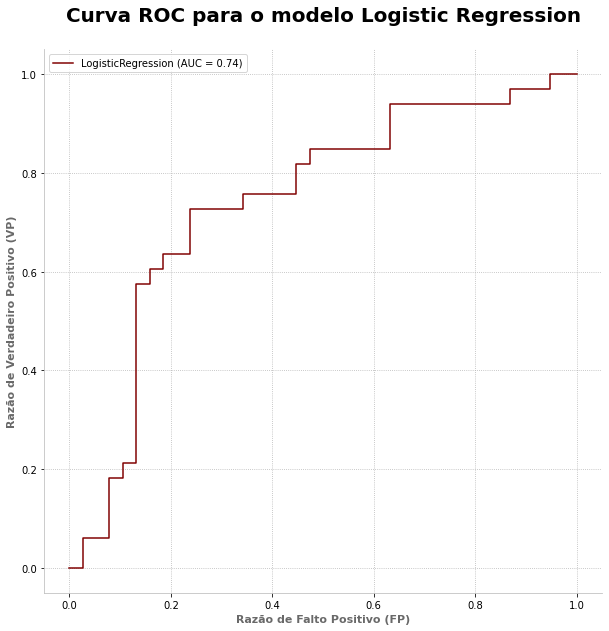

In [26]:
# função para plotar a curva ROC
plota_curva_roc(modelo_lr, 'Logistic Regression', dados_ml, 'maroon')

Para o modelo Logistic Regression o **AUC** encontrado é **0.74**. Abaixo as previsões serão detalhadas na **matriz de confusão**.

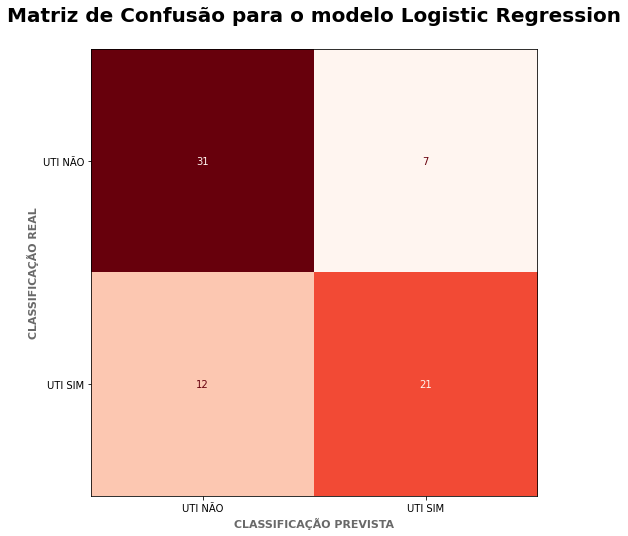

In [27]:
# plota a matriz de confusão
plota_matriz_confusa(modelo_lr, 'Logistic Regression', dados_ml, 'Reds')

A matriz acima mostra os **valores reais** e os que foram **previstos pelo modelo**.

Na matriz temos as informações:
- 33 pacientes precisaram de UTI, o **modelo classificou corretamente 21 desses pacientes - 64%**.

- 38 pacientes não precisaram de UTI, o **modelo classificou corretamente 31 desses pacientes - 82%**.

O modelo não previu corretamente que 12 pessoas (36% do total de pessoas que precisaram de UTI) precisariam de UTI é crítico.

Já sobre os dados de pacientes que não precisaram de UTI, o **modelo errou 7 pessoas (18% do total de pacientes que não precisaram de UTI)**.

O modelo tem uma porcentagem de acerto boa para dizer se o paciente não precisará de UTI, mas os falsos negativos são críticos nessa situação. Ao dizer que um paciente não precisa de UTI, e na realidade ele necessita, a doença pode se agravar antes do paciente ter os cuidados necessários.

Para verificar se esses são os valores encontrados com todos os dados ou somente com essa porção será realizada uma **validação cruzada**.

In [28]:
# realiza validação cruzada do modelo
cv_modelo(modelo_lr, dados_ml, 5, 10)

AUC médio para os dados de teste: 0.7697778729686625
AUC médio para os dados de treino: 0.8518187752038671
Intervalo da AUC para os dados de teste: 0.675589497140343 - 0.863966248796982


(0.7697778729686625, 0.8518187752038671)

Na informação acima um **AUC médio de 0.77** foi encontrado nos dados de teste, muito próximo ao encontrado anteriormente (**0.74**).

O **intervalo** informado foi calculado através do **desvio padrão** e mostra uma variação do **AUC de 0.67 a 0.86**. Essa variação ocorre devido a porção dos dados que são selecionadas para realizar o treino e teste na validação cruzada.

De modo geral o modelo **Random Forest** teve uma performance **MELHOR** que o **Logistic Regression**.

# Modelos SVM (Support Vector Machine)

## Modelo SVC (Support Vector Classification)

Modelos **SVM** são métodos de aprendizado supervisionado utilizados para classificação, regressão e detecção de outliers. Algumas vantagens desses modelos são:

- efetivo em espações multidimensionais;

- efetivo em casos onde o número de dimensões é maior que o número de amostras;

- utilizado uma porção dos dados de treino na função de decisão (chamados vetores de suporte);

Os **hiperparâmetros** informados para o modelo são:

- **C**: parâmetro de regularização inversa, precisa ser um número float positivo;

- **kernel**: informa o tipo de kernel a ser utilizado pelo algoritmo;

- **degree**: grau da função polinomial do kernel ('poly').

- **gamma**: coeficiente do kernel para 'rbf', 'poly' e 'sigmoid';

In [29]:
# dicionário com os hiperparâmetros
hiper_param_svc = {
    'C' : [0.5, 1.0, 3.0, 5.0, 10.0],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 3, 5, 7],
    'gamma' : ['scale', 'auto']
}

# instancia o modelo
modelo_svc = SVC(random_state=481516)

# função para testar os hiperparâmetros
teste_hiperparametro(modelo_svc, dados_ml, hiper_param_svc)

({'C': 3.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'},
 0.7713704523901893)

Os **hiperparâmetros** selecionados pelo **RandomizedSearchCV** são:

- C: **3.0**;

- kernel: **poly**;

- degree: **3**;

- gamma: **scale**;

O AUC encontrado pela validação cruzada realizada pelo RandomizedSearchCV foi **0.77**.

In [30]:
# instancia o modelo com os hiperparâmetros selecionados
modelo_svc = SVC(C=3.0, kernel='poly', degree=3, gamma='scale', random_state=481516,
                 probability=True)

Os dados já foram divididos anteriormente.

O parâmetro **probability** foi adicionado para que o **predict_proba** seja informado.

In [31]:
# treina o modelo
modelo_svc.fit(x_train, y_train)

# realiza a previsão
previsao_svc = modelo_svc.predict(x_test)

# verifica a probabilidade da previsão
prob_prev_svc = modelo_svc.predict_proba(x_test)

### Avaliação do modelo SVC

Como para os modelos anteriores, aqui serão avaliadas as métricas informadas pelo **Classification Report**, **ROC AUC** e **Matriz de Confusão**.

In [32]:
# imprime o Classification Report
print('Classification Report:\n')
print(classification_report(y_test, previsao_svc))

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.69      0.61      0.65        33

    accuracy                           0.69        71
   macro avg       0.69      0.68      0.69        71
weighted avg       0.69      0.69      0.69        71



O **Classification Report** acima demonstra a performance do modelo de **SVC**:

Na coluna **Precision**:

Dentro de todas as previsões indicando que o paciente não precisa de UTI, o modelo acertou 69%.

Dentro de todas as previsões indicando que o paciente precisa de UTI, o modelo acertou 69%.

Na coluna **Recall**:

Considerando os pacientes que não foram para a UTI, o modelo acertou a previsão para 76% desses pacientes.

Considerando os pacientes que foram para a UTI, o modelo acertou a previsão para 61% desses pacientes.

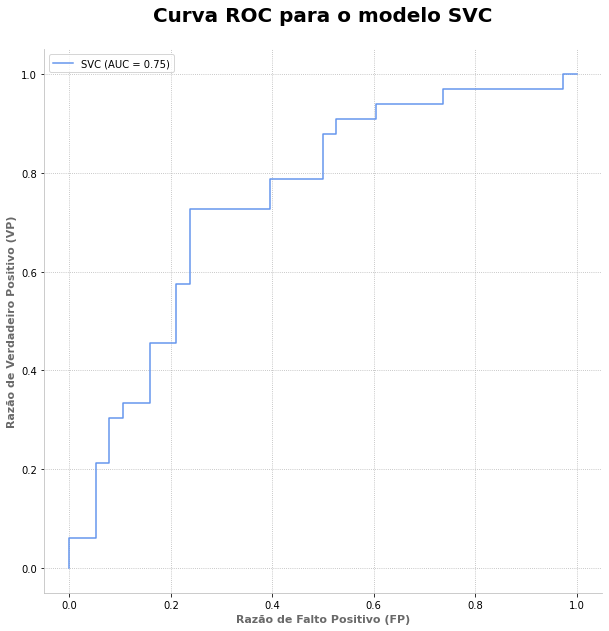

In [33]:
# função para plotar a curva ROC
plota_curva_roc(modelo_svc, 'SVC', dados_ml, 'cornflowerblue')

Para o modelo SVC o **AUC** encontrado é **0.75**. Abaixo as previsões serão detalhadas na **matriz de confusão**.

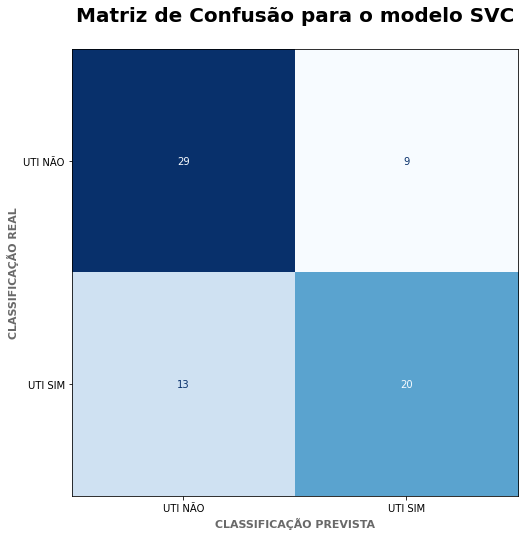

In [34]:
# função para plotar a matriz de confusão
plota_matriz_confusa(modelo_svc, 'SVC', dados_ml, 'Blues')

A **matriz** acima mostra os **valores reais** e os que **foram previstos pelo modelo**.

Na matriz temos as informações:
- 33 pacientes precisaram de UTI, o **modelo classificou corretamente 20 desses pacientes - 61%**.

- 38 pacientes não precisaram de UTI, o **modelo classificou corretamente 29 desses pacientes - 76%**.

O modelo não previu corretamente que 13 pessoas (39% do total de pessoas que precisaram de UTI) precisariam de UTI é crítico.

Já sobre os dados de pacientes que não precisaram de UTI, o **modelo errou 9 pessoas (24% do total de pacientes que não precisaram de UTI)**.

No geral o modelo **NÃO** teve uma performance boa para prever se o paciente precisará ou não de UTI.

Para verificar se esses são os valores encontrados com todos os dados ou somente com essa porção será realizada uma **validação cruzada**.

In [35]:
# realiza validação cruzada do modelo
cv_modelo(modelo_svc, dados_ml, 5, 10)

AUC médio para os dados de teste: 0.7715038229018493
AUC médio para os dados de treino: 0.8645495207952179
Intervalo da AUC para os dados de teste: 0.6837006693069645 - 0.859306976496734


(0.7715038229018493, 0.8645495207952179)

A validação cruzada encontrou um **AUC médio de 0.77** nos dados de teste, muito próximo ao encontrado anteriormente (**0.75**).

O **intervalo** informado foi calculado através do **desvio padrão** e mostra uma variação do **AUC de 0.68 a 0.85**. Essa variação ocorre devido a porção dos dados que são selecionadas para realizar o treino e teste na validação cruzada.

De modo geral o modelo SVC teve uma performance **PIOR** que os modelos anteriores.

## Modelo LinearSVC (Linear Supporte Vector Classification)

Similar ao modelo SVC porém com o parâmetro kernel definido como linear.

Os **hiperparâmetros** informados para o modelo são:

- **penalty**: especifica a norma usada na penalização;

- **dual**: seleciona o algoritmo para resolver o problema de otimização original (primal) ou duplo (dual);

- **C**: parâmetro de regularização;

- **max_iter**: número máximo de iteração que serão processadas;

In [36]:
# dicionário com os hiperparâmetros
hiper_param_linear_svc = {
    'penalty' : ['l1', 'l2'],
    'dual' : [True, False],
    'C' : [0.1, 0.3, 0.5],
    'max_iter' : [300, 500, 1000]
}

# instancia o modelo Linear SVC
modelo_linear_svc = LinearSVC(random_state=481516)

# testa os hiperparâmetros
teste_hiperparametro(modelo_linear_svc, dados_ml, hiper_param_linear_svc)

({'C': 0.1, 'dual': False, 'max_iter': 500, 'penalty': 'l2'},
 0.7689890323936378)

Os **hiperparâmetros** selecionados pelo **RandomizedSearchCV** são:

- penalty: **l2**;

- dual: **False**;

- C: **0.1**;

- max_iter: **500**;

O AUC encontrado pela validação cruzada realizada pelo RandomizedSearchCV foi **0.77**.

In [37]:
# instancia o modelo com os hiperparâmetros selecionados
modelo_linear_svc = LinearSVC(penalty='l2', dual=False, C=0.1, max_iter=500,
                              random_state=481516)

Os dados já foram separados em treino e teste anteriormente.

In [38]:
# treina o modelo
modelo_linear_svc.fit(x_train, y_train)

# realiza a previsão
previsao_linear_svc = modelo_linear_svc.predict(x_test)

O modelo **LinearSVC** não realiza o cálculo do **predict_proba**.

In [39]:
# imprime o Classification Report
print('Classification Report:\n')
print(classification_report(y_test, previsao_linear_svc))

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        38
           1       0.75      0.64      0.69        33

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71



O **Classification Report** acima demonstra a performance do modelo de **LinearSVC**:

Na coluna **Precision**:

Dentro de todas as previsões indicando que o paciente não precisa de UTI, o modelo acertou 72%.

Dentro de todas as previsões indicando que o paciente precisa de UTI, o modelo acertou 75%.

Na coluna **Recall**:

Considerando os pacientes que não foram para a UTI, o modelo acertou a previsão para 82% desses pacientes.

Considerando os pacientes que foram para a UTI, o modelo acertou a previsão para 64% desses pacientes.

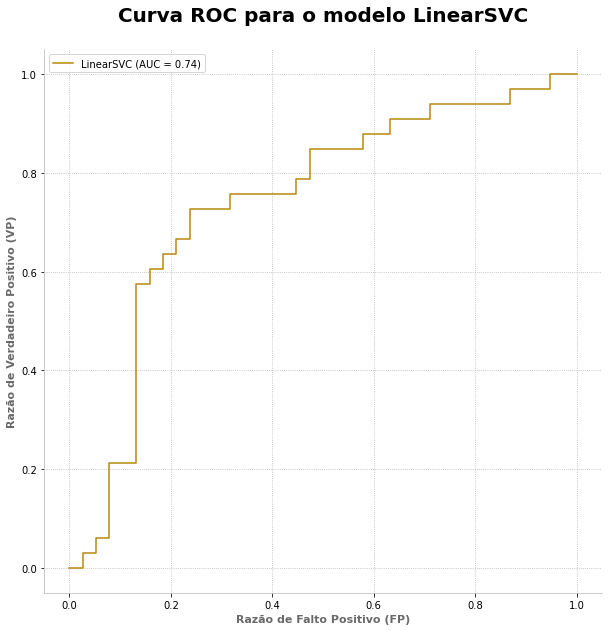

In [40]:
# função para plotar a curva ROC
plota_curva_roc(modelo_linear_svc, 'LinearSVC', dados_ml, 'darkgoldenrod')

Para o modelo LinearSVC o **AUC** encontrado é **0.74**. Abaixo as previsões serão detalhadas na **matriz de confusão**.

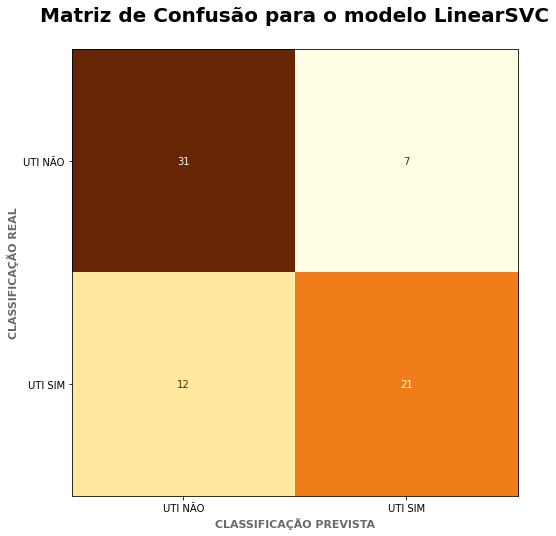

In [41]:
# função para plotar a matriz de confusão
plota_matriz_confusa(modelo_linear_svc, 'LinearSVC', dados_ml, 'YlOrBr')

A **matriz** acima mostra os **valores reais** e os que **foram previstos pelo modelo**.

Na matriz temos as informações:
- 33 pacientes precisaram de UTI, o **modelo classificou corretamente 21 desses pacientes - 64%**.

- 38 pacientes não precisaram de UTI, o **modelo classificou corretamente 31 desses pacientes - 82%**.

O modelo não previu corretamente que 12 pessoas (36% do total de pessoas que precisaram de UTI) precisariam de UTI é crítico.

Já sobre os dados de pacientes que não precisaram de UTI, o **modelo errou 7 pessoas (18% do total de pacientes que não precisaram de UTI)**.

O modelo teve uma boa performance em prever os pacientes que não precisaram de UTI, porém o erro de previsão para 12 pacientes que precisaram de UTI é um ponto a ser considerado.

Para verificar se esses são os valores encontrados com todos os dados ou somente com essa porção será realizada uma **validação cruzada**.

In [42]:
# realiza validação cruzada do modelo
cv_modelo(modelo_linear_svc, dados_ml, 5, 10)

AUC médio para os dados de teste: 0.7700455569205569
AUC médio para os dados de treino: 0.8506038276004844
Intervalo da AUC para os dados de teste: 0.6767899075898329 - 0.8633012062512808


(0.7700455569205569, 0.8506038276004844)

A **validação cruzada** encontrou um **AUC médio de 0.77** nos dados de teste, muito próximo ao encontrado anteriormente (**0.74**).

O **intervalo** informado foi calculado através do **desvio padrão** e mostra uma variação do **AUC de 0.68 a 0.86**. Essa variação ocorre devido a porção dos dados que são selecionadas para realizar o treino e teste na validação cruzada.

De modo geral o modelo LinearSVC teve uma performance **MELHOR** que o modelo SVC, com resultados muito próximos aos encontrados com os modelos Random Forest e Logistic Regression.

# Conclusão

Chegando ao fim desse notebook, e por consequência ao final desse projeto, as conclusões abaixo foram constatadas:

- 4 modelos de classificação foram testados com os dados disponibilizados pelo Hospital Sírio Libanês com o objetivo de prever a necessidade, ou não, de um paciente necessitar de UTI;

- Entre os 4 modelos testados, o melhor desempenho foi apresentado pelo modelo **Random Forest Classifier**, seguido do **LinearSVC** e **Logistic Regression** que apresentaram resultados similares. Abaixo os modelos estão ordenados por desempenho:

1. **Random Forest Classifier**

2. **LinearSVC**

3. **Logistic Regression**

4. **SVC**

### Comparação das métricas de desempenho entre os modelos

| Métrica de Desempenho |Random Forest Classifier|LinearSVC|Logistic Regression|SVC|
|:---------------------:|:----------------------:|:-------:|:-----------:|:-----:|
|PRECISION(0)           | **0.73** | **0.72** | **0.72** | **0.69** |
|PRECISION(1)           | **0.78** | **0.75** | **0.75** | **0.69** |
|RECALL(0)              | **0.84** | **0.82** | **0.82** | **0.76** |
|RECALL(1)              | **0.64** | **0.64** | **0.64** | **0.61** |
|F1.Score(0)            | **0.78** | **0.77** | **0.77** | **0.72** |
|F1.Score(1)            | **0.70** | **0.69** | **0.69** | **0.65** |
|AUC TEST               | **0.80** | **0.77** | **0.77** | **0.77** |
|AUC TREINO             | **0.98** | **0.85** | **0.85** | **0.86** |
|AUC                    | **0.78** | **0.74** | **0.74** | **0.75** |

O desempenho encontrado por alguns dos modelos testados nesse projeto são satisfatórios e podem auxiliar no diagnóstico da necessidade de um leito de UTI por um paciente assim que chegar ao hospital.

Como os modelos Random Forest Classifiers, LinearSVC e Logistic Regression apresentaram resultados próximos, uma solução interessante seria criar um **ensemble** com os 3 modelos e verificar se os resultados encontrados seriam melhores.

## Próximos Passos

As seguintes sugestões podem ser utilizadas para melhorar o desempenho das previsões dos modelos testados nesse projeto:

- Testar outros modelos de classificação e verificar as previsões;

- Criar um *ensemble* dos modelos com a melhor performance que foram testados nesse projeto;

- Testar os modelos adicionando as outras janelas (coluna window) disponíveis nos dados;

## Referências utilizadas durante o projeto

1. [Página do Kaggle com informações sobre a base de dados](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)

2. [Text classification with extremely small datasets](https://towardsdatascience.com/text-classification-with-extremely-small-datasets-333d322caee2)

3. [5 Feature Selection Method From SciKit Learn You Should Know](https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172)

4. [Como Selecionar As Melhores Features Para Seu Modelo de Machine Learning](https://paulovasconcellos.com.br/como-selecionar-as-melhores-features-para-seu-modelo-de-machine-learning-2e9df83d062a)

5. [Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/)

6. [Primeiro caso de Covid-19 pode ter atingindo a Chine em outubro](https://www.cnnbrasil.com.br/saude/primeiro-caso-covid-19-pode-ter-atingido-a-china-em-outubro-de-2019-diz-estudo/)

7. [Evolução dos Sintomas do Covid-19](https://saude.abril.com.br/medicina/casos-sem-sintomas-evolucoes-coronavirus/)

8. [Covid Impact to Global Healthcare](https://edition.cnn.com/videos/world/2021/04/14/covid-impact-global-healthcare-lon-orig.cnn)

9. [Observatório Covid-19 aponta maior colapso sanitário e hospitalar da história do Brasil](https://portal.fiocruz.br/noticia/observatorio-covid-19-aponta-maior-colapso-sanitario-e-hospitalar-da-historia-do-brasil)

10. [Primeiro caso Covid-19 no Brasil](https://saude.abril.com.br/medicina/coronavirus-primeiro-caso-brasil/)

11. [Overfitting e Underfitting em Machine Learning](https://abracd.org/overfitting-e-underfitting-em-machine-learning/#:~:text=Underfitting%20%C3%A9%20uma%20tradu%C3%A7%C3%A3o%20para,Overfitting%20%C3%A9%20o%20oposto)

12. [WHO delivers advice and support for older people during Covid-19](https://www.who.int/news-room/feature-stories/detail/who-delivers-advice-and-support-for-older-people-during-covid-19#:~:text=The%20COVID%2D19%20pandemic,potential%20underlying%20health%20conditions)

13. [Machine Learning in Healthcare](https://healthinformatics.uic.edu/blog/machine-learning-in-healthcare/)

14. [Machine Learning](https://www.ibm.com/cloud/learn/machine-learning)

15. [Hiperparameter Tuning](https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624)

16. [SKLearn Model Selection - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

17. [Entenda o que é AUC e ROC nos modelos de Machine Learning](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772)

18. [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

19. [Understanding a Classification Report For Your Machine Learning Model](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

20. [Understanding AUC ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

21. [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica)

22. [SciKit Learn - RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

23. [SciKit Learn - Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

24. [SciKit Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

25. [SciKit Learn - LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)